# 1. Data downlown and cleaning

In [1]:
# The code was removed by Watson Studio for sharing.

The shape of data set is:  (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### Significance of columns:
   * **App**: Application name
   * **Category**: Category the app belongs to
   * **Rating**: Overall user rating of the app (as when scraped)
   * **Reviews**: Number of user reviews for the app (as when scraped)
   * **Size**: Size of the app (as when scraped)
   * **Installs**: Number of user downloads/installs for the app (as when scraped)
   * **Type**: Paid or Free
   * **Price**: Price of the app (as when scraped)
   * **Content Rating**: Age group the app is targeted at - Children / Mature 21+ / Adult
   * **Genres**: An app can belong to multiple genres (apart from its main category)
   * **Last Updated**: Date when the app was last updated on Play Store (as when scraped)
   * **Current Ver**: Current version of the app available on Play Store (as when scraped)
   * **Android Ver**: Min required Android version (as when scraped)

In [2]:
# drop several columns which will not be useful for this analysis
# because in this study, I'm going to see principlely the category items, so the Genres column will be removed, too

df_google=df_google.drop(['Last Updated','Current Ver', 'Android Ver','Genres','Reviews'],axis=1)
df_google.head(2)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,"500,000+",Free,0,Everyone


In [3]:
# check the types of attributes

df_google.dtypes

App                object
Category           object
Rating            float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [4]:
# check the missing value in dataset

df_google.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [5]:
# because the missing Rating will not influence the statistics study of category, type..., I'll leave them like this at this moment

In [6]:
# check the types in content rating
df_google['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [7]:
# in this study, I'll just study the APP available for all the public, I'll remove the other patterns of the Content Rating

df_google=df_google[df_google['Content Rating']!='Teen']
df_google=df_google[df_google['Content Rating']!='Mature 17+']
df_google=df_google[df_google['Content Rating']!='Everyone 10+']
df_google=df_google[df_google['Content Rating']!='Adults only 18+']
df_google=df_google[df_google['Content Rating']!='Unrated']

In [8]:
df_google[df_google['Content Rating']!='Everyone']

,App,Category,Rating,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,"1,000+",Free,0,Everyone,NaN


In [9]:
# from the above result, we can see the only one Null value in Concent Rating columns concerns a row incorrectly filled, remove this row

df_google.drop([10472],inplace=True)
df_google.isnull().sum(axis=0)

App                  0
Category             0
Rating            1294
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
dtype: int64

In [10]:
print('The shape of data set: ',df_google.shape)
print('The unique App number in dataset: ',df_google['App'].nunique())

The shape of data set:  (8714, 8)
The unique App number in dataset:  7903


In [11]:
# obviously, there are repetition of App names in this table, see what's that

df_countApp=df_google.groupby(by=['App']).count()
df_countApp=df_countApp[df_countApp['Category']!=1]
df_countApp.index.resetname={'App'}
df_countApp.head()

,Category,Rating,Size,Installs,Type,Price,Content Rating
App,,,,,,,
1800 Contacts - Lens Store,2,2,2,2,2,2,2
2017 EMRA Antibiotic Guide,2,2,2,2,2,2,2
21-Day Meditation Experience,2,2,2,2,2,2,2
365Scores - Live Scores,2,2,2,2,2,2,2
8 Ball Pool,7,7,7,7,7,7,7


In [12]:
# check one App with repetition rows and see how is it

df_google[df_google['App']=='1800 Contacts - Lens Store']

,App,Category,Rating,Size,Installs,Type,Price,Content Rating
2322,1800 Contacts - Lens Store,MEDICAL,4.7,26M,"1,000,000+",Free,0,Everyone
2543,1800 Contacts - Lens Store,MEDICAL,4.7,26M,"1,000,000+",Free,0,Everyone


In [13]:
# by checking several Apps who exists in differents rows, it seem they have no difference in
# the resting features, I'm going to keep just one row for these Apps repeated

list_i=[]
for APP in df_countApp.index:
    df_provi=df_google[df_google['App']==APP]
    for i in df_provi.index:
        if i>df_provi.index.min():
            list_i.append(i)     

for j in list_i:
    df_google.drop([j],inplace=True)

print('Now the shape of df_google :',df_google.shape)
print('And the unique App name in the table :',df_google['App'].nunique())

Now the shape of df_google : (7903, 8)
And the unique App name in the table : 7903


In [77]:
df_google.head(3)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Rating3_5
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,10000,Free,0.0,Everyone,4-4.5
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,500000,Free,0.0,Everyone,3.5-4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,5000000,Free,0.0,Everyone,4.5-5


**So that is the dataset I'm going to use for the following analysis**

## 2. Analysis of Category

In [15]:
print('The number of distinct category is: ',df_google['Category'].nunique())

The number of distinct category is:  33


In [16]:
# show all the category titles:

df_google['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [17]:
# get the top 15 category

df_categorycount=pd.DataFrame(df_google.groupby('Category').count()['App'])
df_category15=df_categorycount.sort_values(by=['App'],ascending=False).head(15)
df_category15

,App
Category,
FAMILY,1431
TOOLS,819
GAME,493
BUSINESS,405
MEDICAL,377
PRODUCTIVITY,363
FINANCE,340
LIFESTYLE,333
PERSONALIZATION,311


In [18]:
# import libraries and functions for plotting 

import matplotlib as mtl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
import seaborn as sns
from matplotlib import cm
mtl.cm.get_cmap

<function matplotlib.cm.get_cmap(name=None, lut=None)>

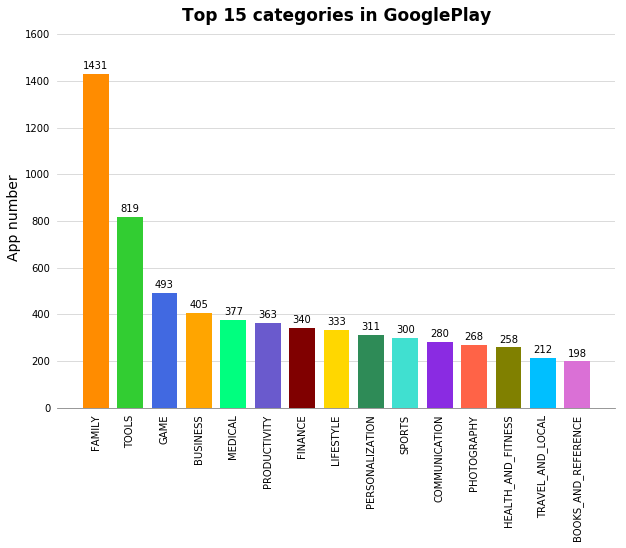

In [19]:
color=['darkorange','limegreen','royalblue','orange','springgreen','slateblue','maroon',
       'gold','seagreen','turquoise','blueviolet','tomato','olive','deepskyblue','orchid']

x=df_category15.index
width=0.75
ymax=df_category15['App'].max()+200

fig,ax=plt.subplots(figsize=(10,7))
bars=ax.bar(x,df_category15['App'],width,label=None,color=color)

ax.set_ylabel('App number',fontsize=14)
ax.set_title('Top 15 categories in GooglePlay',fontsize=17,weight='bold')
ax.set_xticklabels(x,rotation=90)
ax.set_ylim([0,ymax])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgray')
ax.xaxis.grid(False)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bars)

plt.show()

In [20]:
# It maybe also interesting to see which category has less App available, where is potiential to occupy the market earlier.
# we'll see the last 5

df_categorylast5=df_categorycount.sort_values(by=['App'],ascending=False).tail(5)
df_categorylast5



,App
Category,
EVENTS,53
BEAUTY,45
ENTERTAINMENT,37
COMICS,26
DATING,17


#### Little summary

 > In Googleplaystore, there are in total 33 categories, and the category Family has much more Apps than other categories, then there are second    
   numerous App categories Tools. Then from the 3rd numerous category to the 15th, the difference is more gradual.

 > There are still few Apps in the category like Dating, Comics, Entertainment,etc.

### 3. Analysis of installs amount

In [21]:
# because the value in Installs columns is in string type, I'm going to change them to int type by elimiting the + 
# but it should take into consideration that every value has a sense of more than this value

df_google['Installs'].value_counts().index
df_google['Installs'].replace(['1,000,000+', '100,000+', '10,000+', '1,000+', '10,000,000+', '100+',
       '5,000,000+', '5,000+', '50,000+', '500,000+', '10+', '500+', '50+',
       '50,000,000+', '100,000,000+', '5+', '1+', '500,000,000+', '0+',
       '1,000,000,000+'],[1000000, 100000, 10000, 1000, 10000000, 100,
       5000000, 5000, 50000, 500000, 10, 500, 50,
       50000000, 100000000, 5, 1, 500000000, 0,
       1000000000],inplace=True)

df_installrank=df_google.sort_values(by=['Installs'],ascending=False)
df_installrank.head(2)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,Varies with device,1000000000,Free,0,Everyone
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,Varies with device,1000000000,Free,0,Everyone


In [22]:
# see how many App has a large amount of installs 

df_installrank['Installs'].value_counts()

1000000       1105
100000         902
10000          892
1000           787
10000000       693
100            617
5000000        457
5000           425
50000          382
500000         376
10             332
500            293
50             180
50000000       145
100000000      138
5               76
1               61
500000000       19
0               12
1000000000      11
Name: Installs, dtype: int64

In [23]:
# the value counts show there are 11 App having over 1,000,000,000,000 installs
# and there are 19 App having over 500,000,000 installs
# and I'm going to extrait the name of these Apps

df_installsb=df_google[df_google['Installs']==1000000000]
print('The Apps of whom the installs is over 1 billion:',df_installsb['App'].tolist())

print('')

df_installs500m=df_google[df_google['Installs']==500000000]
print('The Apps of whom the installs is over 500 million:',df_installs500m['App'].tolist())

The Apps of whom the installs is over 1 billion: ['Messenger – Text and Video Chat for Free', 'WhatsApp Messenger', 'Google Chrome: Fast & Secure', 'Gmail', 'Hangouts', 'Skype - free IM & video calls', 'Google Photos', 'Maps - Navigate & Explore', 'Google Street View', 'Google', 'Google Drive']

The Apps of whom the installs is over 500 million: ['Viber Messenger', 'imo free video calls and chat', 'Google Duo - High Quality Video Calls', 'LINE: Free Calls & Messages', 'Candy Crush Saga', 'Temple Run 2', 'Pou', 'My Talking Tom', 'Google Translate', 'SHAREit - Transfer & Share', 'Gboard - the Google Keyboard', 'Microsoft Word', 'Dropbox', 'Google Calendar', 'Cloud Print', 'MX Player', 'Clean Master- Space Cleaner & Antivirus', 'Samsung Health', 'Security Master - Antivirus, VPN, AppLock, Booster']


In [24]:
# I'll see which category has that numerous installs

df_installsb_cat=pd.DataFrame(df_installsb['Category'].value_counts())
df_installs500m_cat=pd.DataFrame(df_installs500m['Category'].value_counts())

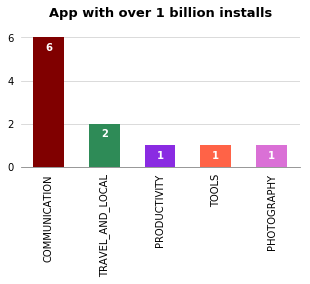

In [25]:
color=['maroon','seagreen','blueviolet','tomato','orchid']

x=df_installsb_cat.index
width=0.55


fig,ax1=plt.subplots(figsize=(5,2.5))
bars1=ax1.bar(x,df_installsb_cat['Category'],width,label=None,color=color)

ax1.set_title('App with over 1 billion installs',fontsize=13,weight='bold',pad=14)
ax1.set_xticklabels(x,rotation=90)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('grey')
ax1.tick_params(bottom=False, left=False)

ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='lightgray')
ax1.xaxis.grid(False)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,-15), 
                    textcoords="offset points",
                    ha='center', va='bottom',color='white',weight='bold')
        
autolabel(bars1)

plt.show()

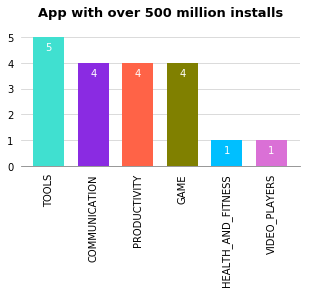

In [26]:
color=['turquoise','blueviolet','tomato','olive','deepskyblue','orchid']

x=df_installs500m_cat.index
width=0.7


fig,ax2=plt.subplots(figsize=(5,2.5))
bars2=ax2.bar(x,df_installs500m_cat['Category'],width,label=None,color=color)

ax2.set_title('App with over 500 million installs',fontsize=13,weight='bold',pad=14)
ax2.set_xticklabels(x,rotation=90)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('grey')
ax2.tick_params(bottom=False, left=False)

ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='lightgray')
ax2.xaxis.grid(False)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,-15), 
                    textcoords="offset points",
                    ha='center', va='bottom',color='white')
        
autolabel(bars2)

plt.show()

#### Little summary

 > There are 11 Apps who have over 1 billion installs and there are 19 Apps who having over 500 million installs
 
 > Among the Apps having over 1 billion installs, most of them are in Communication category
 > Among the Apps having over 500 million installs, category Tools, Game, Communication and Productivity are very remarkable
 
 > Interestingly, compared to the analysis in Part 2, the category who has the highest number of available Apps is not that numerously installed

### 4. Analysis of App rating

In [27]:
import numpy as np

In [28]:
# According to a test not showed here, the rating data focus mainly in the range of 3 - 5, 
# so the following study classe in detail the Apps in that range

df_google['Rating3_5'] = pd.Series()

for j in df_google.index:
    if (df_google.loc[j,'Rating']>4.5)&(df_google.loc[j,'Rating']<=5.0):
        df_google.loc[j,'Rating3_5']='4.5-5',
    elif (df_google.loc[j,'Rating']>4.0)&(df_google.loc[j,'Rating']<=4.5):
        df_google.loc[j,'Rating3_5']='4-4.5',
    elif (df_google.loc[j,'Rating']>3.5)&(df_google.loc[j,'Rating']<=4.0):
        df_google.loc[j,'Rating3_5']='3.5-4',
    elif (df_google.loc[j,'Rating']>3.0)&(df_google.loc[j,'Rating']<=3.5):
        df_google.loc[j,'Rating3_5']='3-3.5',
    elif (df_google.loc[j,'Rating']>0.0)&(df_google.loc[j,'Rating']<=3.0):
        df_google.loc[j,'Rating3_5']='<=3'

df_google['Rating3_5'] = df_google['Rating3_5'].replace(np.nan, 'NoRatingInfo')                
df_google.tail(3)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Rating3_5
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6M,100,Free,0,Everyone,4.5-5
10838,Parkinson Exercices FR,MEDICAL,NaN,9.5M,1000,Free,0,Everyone,NoRatingInfo
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,19M,10000000,Free,0,Everyone,4-4.5


In [29]:
df_rating3_5=df_google.groupby(by=['Rating3_5']).count()[['App']]
df_rating3_5

,App
Rating3_5,
3-3.5,430
3.5-4,1228
4-4.5,3209
4.5-5,1423
<=3,328
NoRatingInfo,1285


In [30]:
# I'm going to remove the NoRatingInfo row and create a pie chart of the distribution of rating

df_rating3_5=df_rating3_5.drop(["NoRatingInfo"])

In [31]:
df_rating3_5=df_rating3_5.reindex(['4.5-5','4-4.5','3.5-4','3-3.5','<=3'])

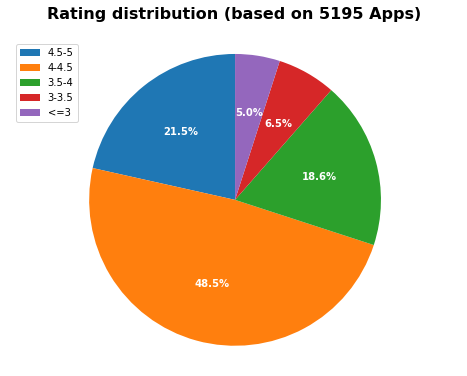

In [32]:
# after removing the NoRatingInfo rows, the following pie chart is based on the rest 5195 Apps

explode_list = [0, 0, 0, 0, 0]

df_rating3_5['App'].plot(kind='pie',
                        figsize=(8,6),
                        startangle=90,
                        autopct='%1.1f%%',
                        labels=None,
                        explode=explode_list,
                        textprops=dict(color="w",weight="bold"))

plt.title(r'Rating distribution (based on 5195 Apps)',fontsize=16,weight='bold', pad=20)
plt.ylabel('')
plt.legend(labels=df_rating3_5.index, loc='upper left') 
plt.axis('equal')

plt.show()

In [33]:
# find the Apps which have larges quantities installs and high rating
# according to test, there are no element rated 4.5 - 5 and having over 1 billion installs; I'll try installs = 500000000

df_rat_insm=df_google[df_google['Rating3_5']=='4.5-5']
df_rat_insm=df_rat_insm[df_rat_insm['Installs']==500000000]
print('There are {} Apps who have over 500 million installs and a rating between 4.5 - 5'.format(df_rat_insm.shape[0]))
df_rat_insm

There are 4 Apps who have over 500 million installs and a rating between 4.5 - 5


,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Rating3_5
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,Varies with device,500000000,Free,0,Everyone,4.5-5
3255,SHAREit - Transfer & Share,TOOLS,4.6,17M,500000000,Free,0,Everyone,4.5-5
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,Varies with device,500000000,Free,0,Everyone,4.5-5
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,Varies with device,500000000,Free,0,Everyone,4.5-5


In [34]:
# And

df_rat_insb=df_google[df_google['Rating3_5']=='4-4.5']
df_rat_insb=df_rat_insb[df_rat_insb['Installs']==1000000000]
print('There are {} Apps who have over 1 billion installs and a rating between 4 - 4.5'.format(df_rat_insb.shape[0]))
df_rat_insb.sort_values(['Rating'],ascending=False)

There are 9 Apps who have over 1 billion installs and a rating between 4 - 4.5


,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Rating3_5
2808,Google Photos,PHOTOGRAPHY,4.5,Varies with device,1000000000,Free,0,Everyone,4-4.5
336,WhatsApp Messenger,COMMUNICATION,4.4,Varies with device,1000000000,Free,0,Everyone,4-4.5
3234,Google,TOOLS,4.4,Varies with device,1000000000,Free,0,Everyone,4-4.5
3454,Google Drive,PRODUCTIVITY,4.4,Varies with device,1000000000,Free,0,Everyone,4-4.5
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,Varies with device,1000000000,Free,0,Everyone,4-4.5
340,Gmail,COMMUNICATION,4.3,Varies with device,1000000000,Free,0,Everyone,4-4.5
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,Varies with device,1000000000,Free,0,Everyone,4-4.5
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,Varies with device,1000000000,Free,0,Everyone,4-4.5
391,Skype - free IM & video calls,COMMUNICATION,4.1,Varies with device,1000000000,Free,0,Everyone,4-4.5


#### Little sumary of App rating

 > The rating data of the whole dataset focus mainly on the range of 3 - 5 
 
 > Based on 5195 apps, almost a half of them has a rating between 4-4.5 (48.5%)
 
 > A lot of Google Apps have both high ranking and high installs amount, aprat from them, there are Apps like Whatsapp, Skype.

### Part 5 Analysis of type and price

In [35]:
# At first, how many App are paid for each category?

df_typeini=df_google[['Category','Type']]
df_typeini['Type'].replace(['Free','Paid'],[0,1],inplace=True)
df_typeini=df_typeini.groupby(['Category']).sum()
df_typeini.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Type
Category,
ART_AND_DESIGN,3
AUTO_AND_VEHICLES,3
BEAUTY,0
BOOKS_AND_REFERENCE,27
BUSINESS,12


In [36]:
# remove the dollar symble of the price and turn the column into float ty^pe

df_google['Price']=df_google['Price'].replace( '[\$,)]','', regex=True).astype(float)

In [37]:
df_typeini['Paid App perc']=pd.Series()
df_typeini['Average Price']=pd.Series()

In [38]:
# calculate the paid App percentage of each category and their average price (for those paid) respectively

for category in df_typeini.index:
    df_typeini.loc[category,'Paid App perc']=(df_typeini.loc[category,'Type'])/(df_google[df_google['Category']==category]['Type'].count())
    df_typeini.loc[category,'Average Price']=df_google[(df_google['Category']==category) & (df_google['Type']=='Paid')]['Price'].mean()

In [76]:
df_typeini.head()

,Type,Paid App perc,Average Price
Category,,,
ART_AND_DESIGN,3,0.050000,1.990000
AUTO_AND_VEHICLES,3,0.036145,4.490000
BEAUTY,0,0.000000,NaN
BOOKS_AND_REFERENCE,27,0.136364,4.325185
BUSINESS,12,0.029630,14.607500


In [40]:
# calculate the average paid app percentage and compare it to the percentage per categary in the plot below

average_paid_perc=(df_google[df_google['Type']=='Paid']['Price'].count())/(df_google['Price'].count())
average_paid_perc

0.0828799190180944

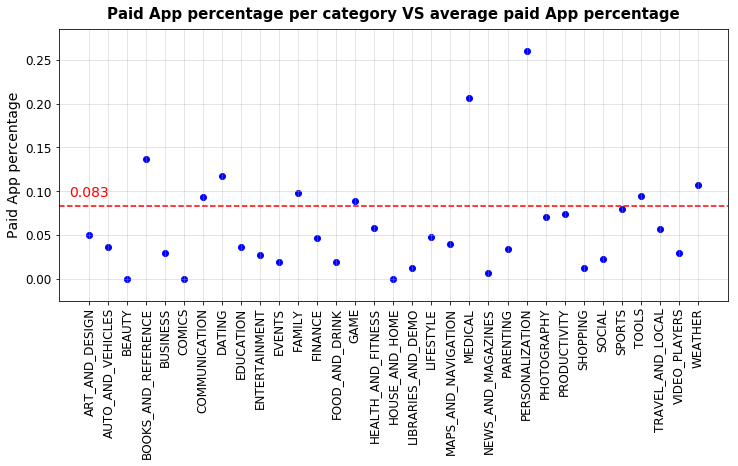

In [41]:
# plot a scatter schema

x=df_typeini.index
y=df_typeini['Paid App perc']
plt.figure(figsize=(12,5))

plt.scatter(x,y,color='blue')
plt.axhline(y=0.083, color='r', linestyle='--')

plt.annotate('0.083',
            xy=(0,0.09),
            ha='center',
            va='bottom',
            fontsize=14,
            color='r')

plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Paid App percentage', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Paid App percentage per category VS average paid App percentage',pad=10, fontsize=15,weight='bold')

plt.grid(alpha=0.4)

plt.show()

In [42]:
# calculate the average price of all paid Apps 

average_price=(df_google['Price'].sum())/(df_google[df_google['Type']=='Paid']['Price'].count())
average_price

14.839740458015267

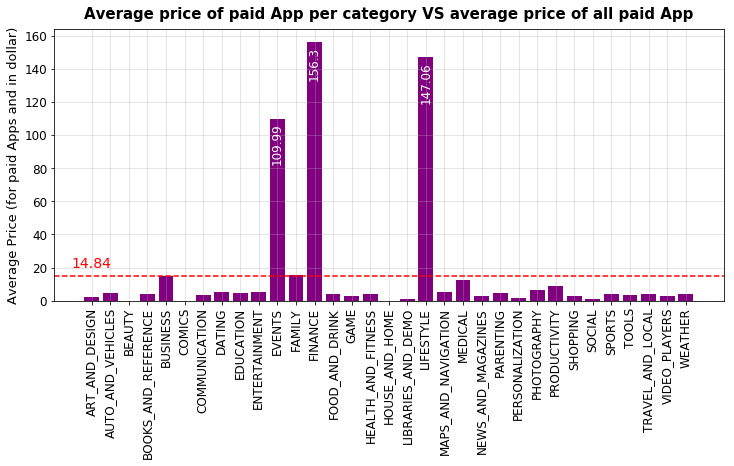

In [43]:
x=df_typeini.index
y=df_typeini['Average Price']
plt.figure(figsize=(12,5))

plt.bar(x,y,color='purple')
plt.axhline(y=14.84, color='r', linestyle='--')

plt.annotate('14.84',
            xy=(0,18),
            ha='center',
            va='bottom',
            fontsize=14,
            color='r')

plt.annotate('109.99',
            xy=(10,82),
            rotation=90,
            ha='center',
            va='bottom',
            fontsize=12,
            color='w')

plt.annotate('156.3',
            xy=(12,133),
            rotation=90,
            ha='center',
            va='bottom',
            fontsize=12,
            color='w')

plt.annotate('147.06',
            xy=(18,119),
            rotation=90,
            ha='center',
            va='bottom',
            fontsize=12,
            color='w')

plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Average Price (for paid Apps and in dollar)',fontsize=13)
plt.yticks(fontsize=12)
plt.title('Average price of paid App per category VS average price of all paid App',pad=10, fontsize=15, weight='bold')

plt.grid(alpha=0.4)

plt.show()

#### Little summary

 > Based on all the App in this dataset, 8.3% Apps are paid and the average price of them is 14.84 dollars
 
 > The categories whose paid App percentage is above the average level are: BOOKS_AND_REFERENCE, COMMUNICATION, DATING, GAME, MEDICAL, PERSONNALISATION, TOOLS and WEATHERS; Among them, MEDICAL and PERSONNALISATION category have very high paid percentage.
 
 > However, the highest average price catery are respectively EVENTS, FINANCE and LIFESTYLE. But it should note the result of EVENTS is based just on one paid App.

### Part 6 Analysis of customs' reviews

In [44]:
body = client_5edcf642cc3e474083e148b74f7ed6ac.get_object(Bucket='courseracapstoneprojects-donotdelete-pr-p3cpfbi5oli7xs',Key='googleplaystore_user_reviews.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_review=df_data_0
df_review.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Significance of columns : 
 * **App**: Name of app
 * **Translated_Review**: User review (Preprocessed and translated to English)
 * **Sentiment**: Positive/Negative/Neutral (Preprocessed)
 * **Sentiment_Polarity**: Sentiment polarity score
 * **Sentiment_Subjectivity**: Sentiment subjectivity score

In [45]:
df_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [46]:
print('Shape of table: ',df_review.shape)
print('Number of distinct App: ',df_review['App'].nunique())

Shape of table:  (64295, 5)
Number of distinct App:  1074


In [47]:
# It seems that there are rows without any information of all the columns besides 'App'
# I'm going to remove these rows

df_review.dropna(inplace=True)
print('Shape of table: ',df_review.shape)
print('Number of distinct App: ',df_review['App'].nunique())
print('')
print('The' 'Isnull' 'cells: \n',df_review.isnull().sum())

Shape of table:  (37427, 5)
Number of distinct App:  865

TheIsnullcells: 
 App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [78]:
df_review.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


## Idea for studying the reviews
 * choose the top 3 App numerous categories
 * respectivily choose one App (high rating and installs amount) from these 3 categories as sample
 * study the positive and negative reviews of these Apps by presenting them in format of wordcloud

In [49]:
# import libraries and functions

!conda install -c conda-forge wordcloud --yes
print('Wordcloud installed!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-base-3.1.3      |   py36hef1b27d_0         6.6 MB
    wordcloud-1.6.0            |   py36h516909a_0         184 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.2 MB

The following NEW packages will be INSTALLED:

    matplotlib-base: 3.1.3-py36hef1b27d_0            
    python_abi:      3.6-1_c

In [50]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [51]:
# from the study above, the top 3 categories are: Family, Tools, Game
# I'm going to previlege the rating at first and then the installs for choosing sample

#### Family category

In [52]:
# Family
df_family=df_google[df_google['Category']=='FAMILY']
df_family=df_family[['App','Rating','Installs','Rating3_5']]
df_family[df_family['Rating3_5']=='4.5-5'].sort_values(['Installs'],ascending=False).head(1)

,App,Rating,Installs,Rating3_5
6578,Township,4.6,50000000,4.5-5


In [53]:
# Because not all the App in df_google exist in df_review, after several try,I found 'Build a Bridge',which has rating of 4.6
# and more than 10,000,000 INSTALLS
df_f_bridge=df_review[df_review['App']=='Build a Bridge!']
print(df_f_bridge.shape)
df_f_bridge.head()

(86, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
18507,Build a Bridge!,I liked build because built bridge always make...,Positive,0.400000,0.500000
18511,Build a Bridge!,A little better graphics ways earn coins watch...,Positive,0.142500,0.600000
18512,Build a Bridge!,Great game physics awesome brain challenging b...,Positive,0.287500,0.681250
18513,Build a Bridge!,"Fun, simple game. Good controls graphics good....",Positive,0.371429,0.515306
18514,Build a Bridge!,"Free until lv 20, awesome asking buying.. demm...",Positive,0.700000,0.900000


In [54]:
# get the number of positive, negative and neutral reviews

df_f_bridge_s=df_f_bridge.groupby(by=['Sentiment']).count()[['App']]
df_f_bridge_s.columns={'count'}
df_f_bridge_s

,count
Sentiment,
Negative,27
Neutral,9
Positive,50


In [55]:
# calculate the average sentiment polarity and sentiment subjectivity

print('The average sentiment polarity is: %.2f'%df_f_bridge['Sentiment_Polarity'].mean())
print('The average sentiment subjectivity is: %.2f'%df_f_bridge['Sentiment_Subjectivity'].mean())

The average sentiment polarity is: 0.09
The average sentiment subjectivity is: 0.51


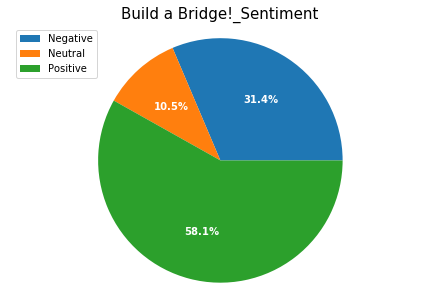

In [56]:
# add a pie chart to show this count

df_f_bridge_s['count'].plot(kind='pie',
                        figsize=(7.5,5),
                        autopct='%1.1f%%',
                        labels=None,
                        textprops=dict(color="w",weight="bold"))

plt.title('Build a Bridge!_Sentiment',fontsize=15)
plt.ylabel('')
plt.legend(labels=df_f_bridge_s.index, loc='upper left') 
plt.axis('equal')

plt.show()

In [57]:
text_f = " ".join(df_f_bridge['Translated_Review'][i] for i in df_f_bridge[df_f_bridge['Sentiment']=='Positive']['Translated_Review'].index)
text_f_n = " ".join(df_f_bridge['Translated_Review'][i] for i in df_f_bridge[df_f_bridge['Sentiment']=='Negative']['Translated_Review'].index)
    
print ("There are {} words in the combination of all positive review.".format(len(text_f)))
print ("There are {} words in the combination of all negative review.".format(len(text_f_n)))

There are 2599 words in the combination of all positive review.
There are 1813 words in the combination of all negative review.


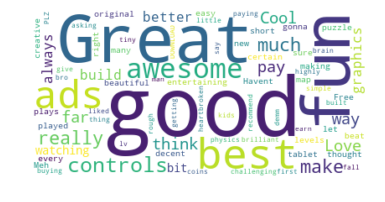

In [58]:
# Build the word cloud according to the positive reveiews

stopwords = set(STOPWORDS)
stopwords.update(["game", "play", "bridge",'level'])

wordcloud_f = WordCloud(max_words=80, background_color="white",stopwords=stopwords).generate(text_f)

plt.imshow(wordcloud_f, interpolation='bilinear')
plt.axis("off")
plt.show()

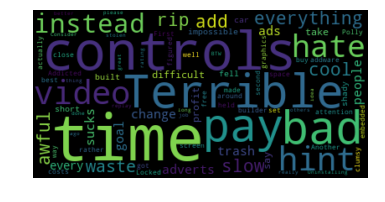

In [59]:
# Build the word cloud according to the negative reveiews

stopwords = set(STOPWORDS)
stopwords.update(["game", "play", "bridge",'level','much','levels','watch'])

wordcloud_f_n = WordCloud(max_words=80, background_color="black",stopwords=stopwords).generate(text_f_n)

plt.imshow(wordcloud_f_n, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Tools category

In [60]:
# Tools
# with the same method, I found the 'CM Locker - Security Lockscreen' for TOOLS category
# with a rating of 4.6 and over 100,000,000 installs

df_t_locker=df_review[df_review['App']=='CM Locker - Security Lockscreen']
df_t_locker.shape

(86, 5)

In [61]:
# get the number of positive, negative and neutral reviews

df_t_locker_s=df_t_locker.groupby(by=['Sentiment']).count()[['App']]
df_t_locker_s.columns={'count'}
df_t_locker_s

,count
Sentiment,
Negative,15
Neutral,15
Positive,56


In [62]:
# calculate the average sentiment polarity and sentiment subjectivity

print('The average sentiment polarity is: %.2f'%df_t_locker['Sentiment_Polarity'].mean())
print('The average sentiment subjectivity is: %.2f'%df_t_locker['Sentiment_Subjectivity'].mean())

The average sentiment polarity is: 0.24
The average sentiment subjectivity is: 0.48


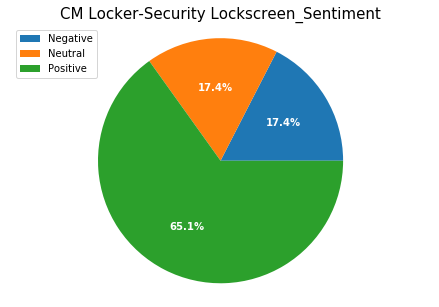

In [63]:
# add a pie chart to show this count

df_t_locker_s['count'].plot(kind='pie',
                        figsize=(7.5,5),
                        autopct='%1.1f%%',
                        labels=None,
                        textprops=dict(color="w",weight="bold"))

plt.title('CM Locker-Security Lockscreen_Sentiment',fontsize=15)
plt.ylabel('')
plt.legend(labels=df_t_locker_s.index, loc='upper left') 
plt.axis('equal')

plt.show()

In [64]:
text_t = " ".join(df_t_locker['Translated_Review'][i] for i in df_t_locker[df_t_locker['Sentiment']=='Positive']['Translated_Review'].index)
text_t_n = " ".join(df_t_locker['Translated_Review'][i] for i in df_t_locker[df_t_locker['Sentiment']=='Negative']['Translated_Review'].index)

print ("There are {} words in the combination of all positive review.".format(len(text_t)))
print ("There are {} words in the combination of all negative review.".format(len(text_t_n)))

There are 4417 words in the combination of all positive review.
There are 877 words in the combination of all negative review.


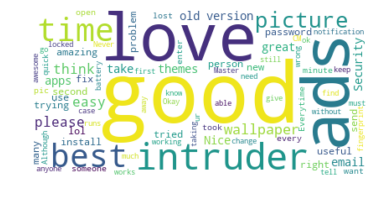

In [65]:
# Build the word cloud according to the positive reveiews

stopwords = set(STOPWORDS)
stopwords.update(["phone","screen","even","really","locker",'lock','unlock','app','lockscreen'])

wordcloud_t = WordCloud(max_words=80, background_color="white",stopwords=stopwords).generate(text_t)

plt.imshow(wordcloud_t, interpolation='bilinear')
plt.axis("off")
plt.show()

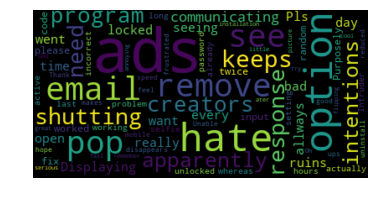

In [66]:
# Build the word cloud according to the negative reveiews

stopwords = set(STOPWORDS)
stopwords.update(["lock",'screen','lockscreen','unlock','phone'])

wordcloud_t_n = WordCloud(max_words=80, background_color="black",stopwords=stopwords).generate(text_t_n)

plt.imshow(wordcloud_t_n, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Game category

In [67]:
# Game
# Similaly, I found 'Hill Climb Racing 2' for Game category
# with a rating of 4.6 and over 100,000,000 installs

df_g_hill=df_review[df_review['App']=='Hill Climb Racing 2']
df_g_hill.shape

(64, 5)

In [68]:
# get the number of positive, negative and neutral reviews

df_g_hill_s=df_g_hill.groupby(by=['Sentiment']).count()[['App']]
df_g_hill_s.columns={'count'}
df_g_hill_s

,count
Sentiment,
Negative,11
Neutral,6
Positive,47


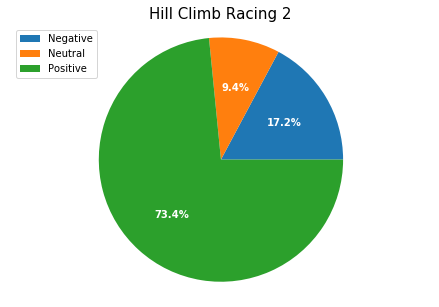

In [69]:
# add a pie chart to show this count

df_g_hill_s['count'].plot(kind='pie',
                        figsize=(7.5,5),
                        autopct='%1.1f%%',
                        labels=None,
                        textprops=dict(color="w",weight="bold"))

plt.title('Hill Climb Racing 2',fontsize=15)
plt.ylabel('')
plt.legend(labels=df_g_hill_s.index, loc='upper left') 
plt.axis('equal')

plt.show()

In [70]:
# calculate the average sentiment polarity and sentiment subjectivity

print('The average sentiment polarity is: %.2f'%df_g_hill['Sentiment_Polarity'].mean())
print('The average sentiment subjectivity is: %.2f'%df_g_hill['Sentiment_Subjectivity'].mean())

The average sentiment polarity is: 0.16
The average sentiment subjectivity is: 0.48


In [71]:
text_g = " ".join(df_g_hill['Translated_Review'][i] for i in df_g_hill[df_g_hill['Sentiment']=='Positive']['Translated_Review'].index)
text_g_n = " ".join(df_g_hill['Translated_Review'][i] for i in df_g_hill[df_g_hill['Sentiment']=='Negative']['Translated_Review'].index)
    
print ("There are {} words in the combination of all review.".format(len(text_g)))
print ("There are {} words in the combination of all review.".format(len(text_g_n)))

There are 5339 words in the combination of all review.
There are 1221 words in the combination of all review.


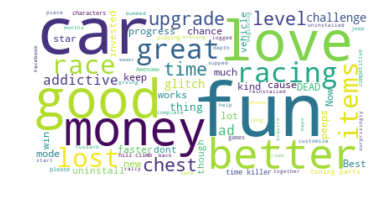

In [72]:
# Build the word cloud according to the positive reveiews

stopwords = set(STOPWORDS)
stopwords.update(['game','make','play','really','need','many','way'])

wordcloud_g = WordCloud(max_words=80, background_color="white",stopwords=stopwords).generate(text_g)

plt.imshow(wordcloud_g, interpolation='bilinear')
plt.axis("off")
plt.show()

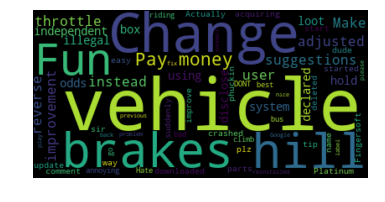

In [73]:
# Build the word cloud according to the negative reveiews

stopwords = set(STOPWORDS)
stopwords.update(['game','fully'])

wordcloud_g_n = WordCloud(max_words=80, background_color="black",stopwords=stopwords).generate(text_g_n)

plt.imshow(wordcloud_g_n, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Little summary

 > In this part, the study is focus on the revews of three Apps from the top numerous caterory and with high rating and installs amount; they could be an successful examplr of its category, but it's not appropriate to compare among them.
 
 > The percentage of positive, negative and neutral reviews, the mean of sentiment_poliraty and sentiment subjectivity are showed
 
 > the text analysis of all theirs positive and negative reviews don't got an expected result, because they can't really reveal the distinct successful aspects or the specific problems.